**MACHINE LEARNING DIGITAL ASSIGNMENT 1**

> **ASHISH PATEL**

> **22MCA0394**

TASK
1) Design Multiple Linear Regressions (MLR) for estimate the Mileage per gallon (MPG) using
Auto-MPG dataset.
Dataset: https://www.kaggle.com/datasets/uciml/autompg-dataset
Note: Remove car name feature from the original dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model_year        int64
origin            int64
car name         object
dtype: object

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
cdf = df[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']]
cdf.head(9)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
5,15.0,8,429.0,198,4341,10.0,70,1
6,14.0,8,454.0,220,4354,9.0,70,1
7,14.0,8,440.0,215,4312,8.5,70,1
8,14.0,8,455.0,225,4425,10.0,70,1


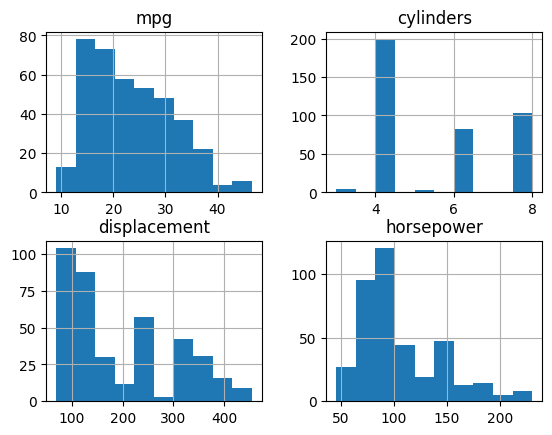

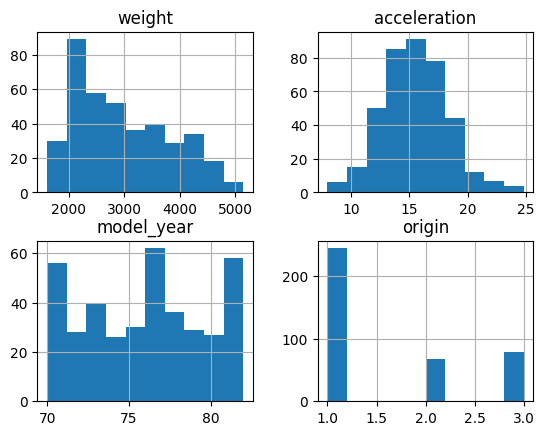

In [ ]:
viz = df[['mpg',	'cylinders', 'displacement','horsepower']]
viz.hist()
plt.show()

viz2 = df[['weight','acceleration',	'model_year',	'origin']]
viz2.hist()
plt.show()

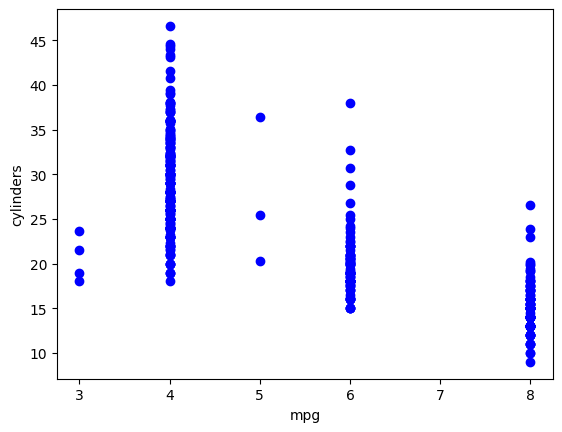

In [ ]:
plt.scatter(cdf.cylinders, cdf.mpg,  color='blue')
plt.xlabel("mpg")
plt.ylabel("cylinders")
plt.show()

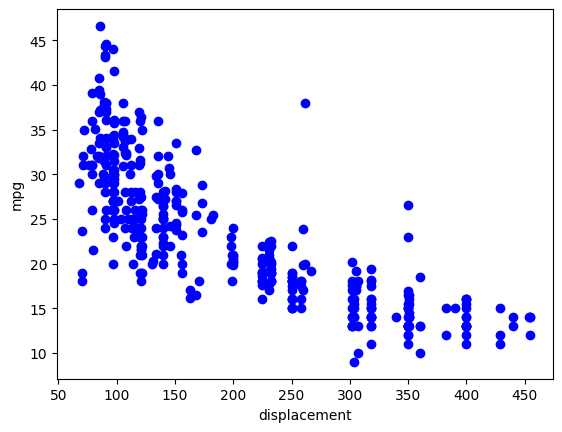

In [ ]:
plt.scatter(cdf.displacement, cdf.mpg,  color='blue')
plt.xlabel("displacement")
plt.ylabel("mpg")
plt.show()

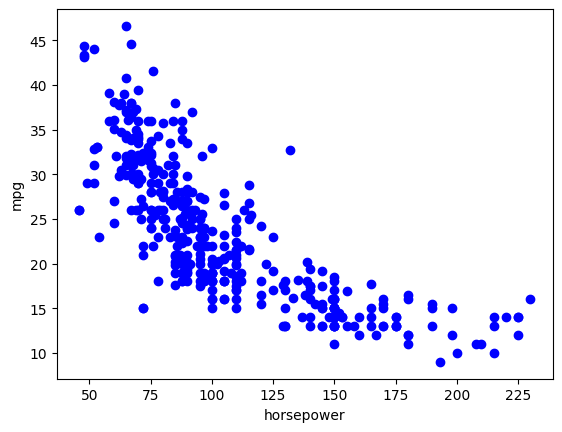

In [ ]:
plt.scatter(cdf.horsepower, cdf.mpg,  color='blue')
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()

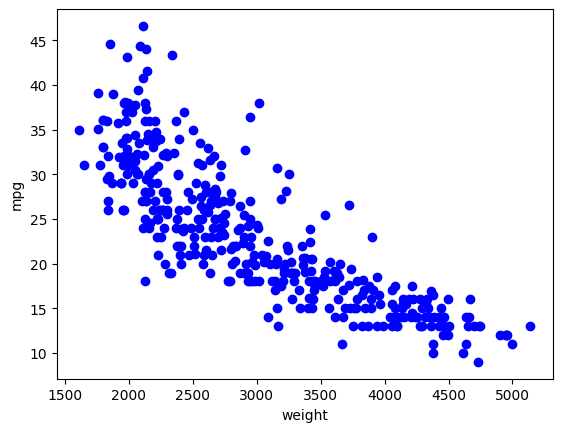

In [ ]:
plt.scatter(cdf.weight, cdf.mpg,  color='blue')
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()

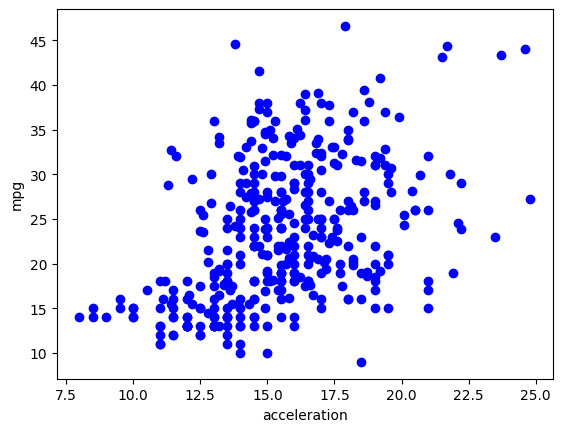

In [ ]:
plt.scatter(cdf.acceleration, cdf.mpg,  color='blue')
plt.xlabel("acceleration")
plt.ylabel("mpg")
plt.show()

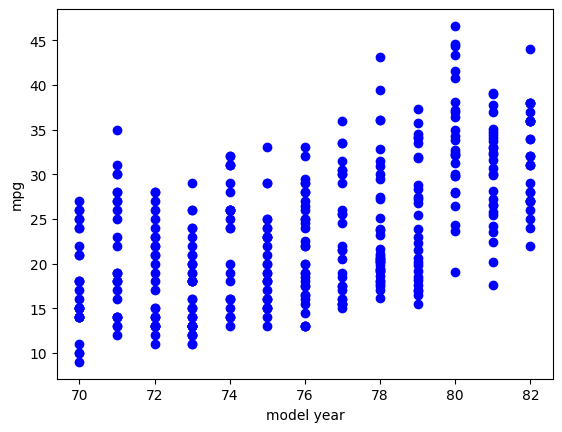

In [ ]:
plt.scatter(cdf.model_year, cdf.mpg,  color='blue')
plt.xlabel("model year")
plt.ylabel("mpg")
plt.show()

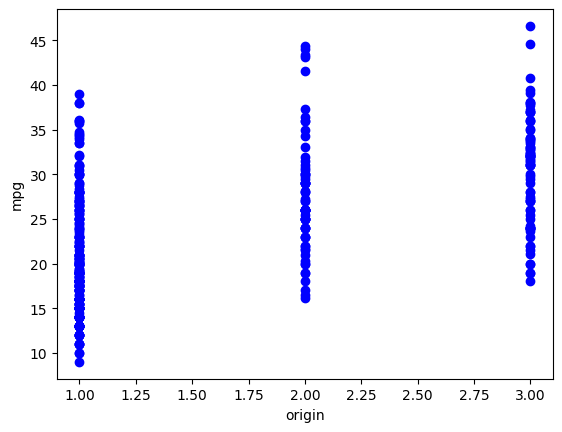

In [ ]:
plt.scatter(cdf.origin, cdf.mpg,  color='blue')
plt.xlabel("origin")
plt.ylabel("mpg")
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regr_m = linear_model.LinearRegression()
train_x = np.asanyarray(train[['displacement',	'horsepower']])
train_y = np.asanyarray(train[['mpg']])
regr_m.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr_m.coef_)
print ('Intercept: ',regr_m.intercept_)

test_x = np.asanyarray(test[['displacement',	'horsepower']])
test_y = np.asanyarray(test[['mpg']])
test_y_ = regr_m.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Coefficients:  [[-0.04069687 -0.05941015]]
Intercept:  [37.650988]
Mean absolute error: 3.60
Residual sum of squares (MSE): 20.26
R2-score: 0.52


In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regr_m = linear_model.LinearRegression()
train_x = np.asanyarray(train[['weight',	'acceleration']])
train_y = np.asanyarray(train[['mpg']])
regr_m.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr_m.coef_)
print ('Intercept: ',regr_m.intercept_)

test_x = np.asanyarray(test[['weight',	'acceleration']])
test_y = np.asanyarray(test[['mpg']])
test_y_ = regr_m.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Coefficients:  [[-0.00734936  0.27987644]]
Intercept:  [41.00524288]
Mean absolute error: 3.32
Residual sum of squares (MSE): 18.10
R2-score: 0.62


In [ ]:
from sklearn import linear_model
from sklearn.metrics import r2_score

regr_m = linear_model.LinearRegression()
train_x = np.asanyarray(train[['displacement',	'horsepower',	'weight',	'acceleration', 'model_year']])
train_y = np.asanyarray(train[['mpg']])
regr_m.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr_m.coef_)
print ('Intercept: ',regr_m.intercept_)

test_x = np.asanyarray(test[['displacement',	'horsepower',	'weight',	'acceleration','model_year']])
test_y = np.asanyarray(test[['mpg']])
test_y_ = regr_m.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Coefficients:  [[ 0.00287287 -0.00456756 -0.00675165  0.06869501  0.74038763]]
Intercept:  [-13.91284047]
Mean absolute error: 2.57
Residual sum of squares (MSE): 11.38
R2-score: 0.77
